# Premières manipulations

On utilisera pandas : https://pandas.pydata.org/ pour nos données

Un data frame c'est une matrice. où :
  - une ligne c'est un objet
  - une colonne c'est un attribut

Un dataframe décrit des individus par un ensemble de caractéristiques qui peuvent être de nature diverses : 
  - nombre réel 
  - entier (attention à la moyenne)
  - catégorie (couleur, oui/non, femme/homme, ...)
  - ordre
  
Il peut y avoir des colonnes de prédictions (oui/non, valeur, ...)

Il y a tout un tas d'autres types de données :

  - time series (ce n'est pas une série netflix...) : évolution d'une données réelle dans le temps (comme le prix de l'action netflix justement)
  - données spaciales : coordonée + type de données (maison, forêt, etc)
  - graphes (relations)

## Lire des données

On va utiliser des données de : https://www.data.gouv.fr, en particulier celle-ci: https://www.data.gouv.fr/fr/datasets/ficher-des-prenoms-de-1900-a-2019/

Lorsque l'on lit des données, il est **crucial** de ne pas se précipiter. On va suivre le protocole suivant :

1. On télécharge les données et on les lit avec un éditeur de texte/excel pour **voir** les données
2. Si les données sont dans un format texte, on charge le fichier avec un **éditeur de texte** (comme [visual studio](https://visualstudio.microsoft.com/fr/) par exemple) pour **analyser** le format utilisé car il existe toujours plein de variantes d'un même format
3. dans un projet vide, on construit la (ou les) commande(s) permettant de charger les données
4. **on vérifie que ce qui est chargé est conforme à ce qu'on veut !**. Ce n'est souvent pas le cas. Par exemple : 
    - nombres qui sont lus comme des chaines de caractères, 
    - séparateur de décimal non correct,
    - accents décadents (si le fichier n'est pas encodé en utf-8)
    - première ligne prise pour des données alors que c'est le nom des colonnes
    - ... (tellement de possibilités d'erreurs que l'ion ne peut tous les noter)
5. on copie/colle les commandes de chargement dans le projet existant.

### Téléchargement des données

Le lien https://www.data.gouv.fr/fr/datasets/ficher-des-prenoms-de-1900-a-2019/ mène sur le site de l'insee. On se rend compte que les données ont ét mises à jour sur le site de l'insee (c'est maintenant les naissances jusqu'en 2020 et non plus 2019. Il y aurait beaucoup à dire sur la cohérence des données, et la gestion des liens, mais bon). On va télécharger le fichier "*Fichiers France hors Mayotte*" au format [csv](https://fr.wikipedia.org/wiki/Comma-separated_values). 

C'est un fichier zip que l'on décompresse. Il se nomme _nat2020.csv_

#### excel

On ouvre le fichier avec excel. On remarque :

- le fichier comporte 4 colonnes, dont le nom est la première ligne
    - sexe : le sexe
    - preusuel : prénom usuel
    - annais : année naissance
    - nombre : nombre d'enfants de ce nom et ce sexe né [cette année là](https://www.youtube.com/watch?v=Oei7OKqadS8)
- il y a 667365 lignes (c'est à la fois beaucoup et peu)

Le dictionnaire des modalités est décrit : https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#dictionnaire

On peut remarquer que :

- le sexe est 1 pour les ♂ et 2 pour les ♀ (c'est le format standard)
- aucun enfant ne s'appelle *_PRENOMS_RARES*... La modalité est expliquée là : https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#documentation
- l'année de naissance peut être *XXXX*, qui n'est pas un nombre. 

#### éditeur de texte

En ouvrant fichier avec un éditeur de texte (jupyter permet de le faire, ou [vscode](https://code.visualstudio.com/) par exemple), on se rend compte que le séparateur n'est pas la `,` mais le `;`.

> **Danger** : Cette pratique est courante lorsque le fichier est sauvé par un excel français, où la virgule est le séparateur de décimal.

Pour éviter tout soucis, je vous conseille de rester international dans vos fichiers :

- séparateur de décimal : `.`
- séparateur de colonnes : `,`

Mais ici on a pas le choix, les données sont de ce type. Il faut faire avec.

> **Règle d'or** : On ne modifie pas le fichier de données initial, on modifie la procédure de chargement.

### Lecture des données avec jupyter

En panda, la lecture de fichier csv se fait avec la commande : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Il faut trouver le moyen :

- charger un fichier dans une url (en copiant le lien depuis 
- de lire des fichiers zip
- de changer le séparateur de colonnes


In [1]:
import pandas

Pandas nous permet de lire le fichier depuis notre disque dur, à l'endroit où est notre fichier jupyter :

In [2]:
prenom = pandas.read_csv("nat2020_csv.zip",
                         compression='zip',
                         sep=";")

Mais on peut aussi le récupérer directemnt depuis internet si on connait son adresse :

In [ ]:
# décommentez les 3 lignes ci-après pour le faire

# prenom = pandas.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/nat2020_csv.zip",
#                          compression='zip',
#                          sep=";")

In [3]:
prenom

sexe        preusuel annais  nombre
0          1  _PRENOMS_RARES   1900    1250
1          1  _PRENOMS_RARES   1901    1342
2          1  _PRENOMS_RARES   1902    1330
3          1  _PRENOMS_RARES   1903    1286
4          1  _PRENOMS_RARES   1904    1430
...      ...             ...    ...     ...
667359     2           ZYNEB   2017       6
667360     2           ZYNEB   2018       5
667361     2           ZYNEB   2019       7
667362     2           ZYNEB   2020       8
667363     2           ZYNEB   XXXX      19

[667364 rows x 4 columns]

Les données sont chargées, on vérifie que tout est correct. 

In [4]:
# premières lignes.
prenom.head(30)

sexe        preusuel annais  nombre
0      1  _PRENOMS_RARES   1900    1250
1      1  _PRENOMS_RARES   1901    1342
2      1  _PRENOMS_RARES   1902    1330
3      1  _PRENOMS_RARES   1903    1286
4      1  _PRENOMS_RARES   1904    1430
5      1  _PRENOMS_RARES   1905    1472
6      1  _PRENOMS_RARES   1906    1451
7      1  _PRENOMS_RARES   1907    1514
8      1  _PRENOMS_RARES   1908    1509
9      1  _PRENOMS_RARES   1909    1526
10     1  _PRENOMS_RARES   1910    1666
11     1  _PRENOMS_RARES   1911    1572
12     1  _PRENOMS_RARES   1912    1608
13     1  _PRENOMS_RARES   1913    1604
14     1  _PRENOMS_RARES   1914    1597
15     1  _PRENOMS_RARES   1915    1208
16     1  _PRENOMS_RARES   1916    1025
17     1  _PRENOMS_RARES   1917    1148
18     1  _PRENOMS_RARES   1918    1157
19     1  _PRENOMS_RARES   1919    1030
20     1  _PRENOMS_RARES   1920    1535
21     1  _PRENOMS_RARES   1921    1617
22     1  _PRENOMS_RARES   1922    1574
23     1  _PRENOMS_RARES   1923    1931
24     1  _PRENOMS_RARES   1924    2475
25     1  _PRENOMS_RARES   1925    2844
26     1  _PRENOMS_RARES   1926    2919
27     1  _PRENOMS_RARES   1927    2711
28     1  _PRENOMS_RARES   1928    2506
29     1  _PRENOMS_RARES   1929    2445

In [5]:
# dernières lignes
prenom.tail(15)

sexe preusuel annais  nombre
667349     2    ZYNEB   2005       5
667350     2    ZYNEB   2006       4
667351     2    ZYNEB   2008      11
667352     2    ZYNEB   2010       7
667353     2    ZYNEB   2011       5
667354     2    ZYNEB   2012       8
667355     2    ZYNEB   2013       4
667356     2    ZYNEB   2014      10
667357     2    ZYNEB   2015       7
667358     2    ZYNEB   2016       6
667359     2    ZYNEB   2017       6
667360     2    ZYNEB   2018       5
667361     2    ZYNEB   2019       7
667362     2    ZYNEB   2020       8
667363     2    ZYNEB   XXXX      19

On vérifie le type des données :

In [6]:
# forme du dataframe
prenom.shape

(667364, 4)

In [7]:
len(prenom.index), len(prenom.columns)

(667364, 4)

In [8]:
prenom.columns

Index(['sexe', 'preusuel', 'annais', 'nombre'], dtype='object')

Type des données. `object`signifiant chaine de caractère. C'est le cas de `annais` à cause des `XXXX`.

In [9]:
prenom.dtypes

sexe         int64
preusuel    object
annais      object
nombre       int64
dtype: object

## transformer les données

On va maintenant essayer de voir ce qu'il y a dans les données. Pour cela, on va extraire de celles-ci un sous ensemble des données permettant de répondre à une question spécifiqueque l'on se pose. 

> **Rappel** : On copie toujours les données initiales, on ne les modifie **jamais**

### chainage des données

Pour transformer les données, on va chaîner les opérations, chaque opération élémentaire etant passée à l'opération suivante : une opération complexe est un chaînage d'opérations simple.

Cette technique rend le code lisible et réutilisable. Deux 
tutos bien fait sur ces méthodes : 
 
* https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69
* https://tomaugspurger.github.io/modern-1-intro

>  **Bonne pratique** : On utilise le plus souvent possible des opérations qui recréent de nouveaux tableaux, ce qui permet de respecter la règle d'or : **ON NE MODIFIE JAMAIS LES DONNEES INITIALES !** (je l'ai déjà dit, non ?)

### tutos

Il existe de nombreux tutos pour manipuler les données en pandas. Il ne faut pas hésiter à chercher un peu pour faire ses analyses.

* https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
* http://queirozf.com/entries/pandas-dataframe-examples-column-operations
* https://wiki.centrale-marseille.fr/informatique/public:appro-s7:td6
* https://geo-python.github.io/2017/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html
* ...

Et bien sur, la doc officielle : https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

### exemple : les prénoms les plus populaires

On veut connaître les prénoms les plus donnés.

On va effectuer plusieurs opérations sur les données, d'abord individuellement, puis en les chaînant.

####  renommage de colonnes

Renommons les colonnes que l'on va utiliser en quelque chose de plus explicite.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html 

In [10]:
prenom.rename(columns={"preusuel": "prénom", "annais": "années"})

sexe          prénom années  nombre
0          1  _PRENOMS_RARES   1900    1250
1          1  _PRENOMS_RARES   1901    1342
2          1  _PRENOMS_RARES   1902    1330
3          1  _PRENOMS_RARES   1903    1286
4          1  _PRENOMS_RARES   1904    1430
...      ...             ...    ...     ...
667359     2           ZYNEB   2017       6
667360     2           ZYNEB   2018       5
667361     2           ZYNEB   2019       7
667362     2           ZYNEB   2020       8
667363     2           ZYNEB   XXXX      19

[667364 rows x 4 columns]

Rename redonne un nouveau dataframe, on a pas modifié les données initiales.


In [11]:
# décommentez l'instruction ci-dessous pour voir que les données initiales sont conservées.

# prenom.columns

Index(['sexe', 'preusuel', 'annais', 'nombre'], dtype='object')

#### changement des modalités

On va dire que les garçons c'est ♂ et les filles c'est ♀, c'est plus explicit qu'un codage 1, 2.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html

Ici, on crée une nouvelle colonne qui a le même nom que l'ancienne, ce qui revient à la modifier. 

Pour comprendre comment on fait on va procéder par étapes :

1. qu'est-ce qu'une colonne en panda
2. comment créer une colonne
3. comment assigner une colonne
4. combiner le tout pour changer notre colonne

In [12]:
# une colonne

prenom.sexe

0         1
1         1
2         1
3         1
4         1
         ..
667359    2
667360    2
667361    2
667362    2
667363    2
Name: sexe, Length: 667364, dtype: int64

Une autre façon de trouver une colonne : 

In [13]:
# décommentez pour voir

prenom['sexe']

0         1
1         1
2         1
3         1
4         1
         ..
667359    2
667360    2
667361    2
667362    2
667363    2
Name: sexe, Length: 667364, dtype: int64

In [14]:
#la nouvelle colonne

['♂' if x == 1 else '♀' for x in prenom.sexe]

['♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂'

L'exemple précédent utilise les [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)  qui sont des façons rapide de créer des listes. 

C'est équivalent à :

In [ ]:
ma_liste = []

for x in prenom.sexe:
    if x == 1:
        ma_liste.append('♂')
    else:
        ma_liste.append('♀')

ma_liste

La méthode [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html) permet d'ajouter/remplacer une colonne existante. On peut procéder de deux façons :

1. en assignatnt directement la colonne
2. en passant par une fonction

In [15]:
#méthode 1 :

prenom.assign(sexe=['♂' if x == 1 else '♀' for x in prenom.sexe])

sexe        preusuel annais  nombre
0         ♂  _PRENOMS_RARES   1900    1250
1         ♂  _PRENOMS_RARES   1901    1342
2         ♂  _PRENOMS_RARES   1902    1330
3         ♂  _PRENOMS_RARES   1903    1286
4         ♂  _PRENOMS_RARES   1904    1430
...     ...             ...    ...     ...
667359    ♀           ZYNEB   2017       6
667360    ♀           ZYNEB   2018       5
667361    ♀           ZYNEB   2019       7
667362    ♀           ZYNEB   2020       8
667363    ♀           ZYNEB   XXXX      19

[667364 rows x 4 columns]

In [ ]:
# méthode 2 : 

prenom.assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in df.sexe])

Dans l'esemple précédent on a utilisé une fonction [lambda](https://www.w3schools.com/python/python_lambda.asp) qui permet de créer et d'exécuter immédiatement une fonction d'une ligne. C'est très pratique. 

C'est équivalent à :

In [ ]:
def f(df):
    return ['♂' if x == 1 else '♀' for x in df.sexe]

prenom.assign(sexe=f)

> **Attention** : on passe la fonction en paramètre, c'est à dire `f`, et pas son résultat qui est `f(x)`

#### on combine les deux

In [16]:
# A l'ancienne

p2 = prenom.rename(columns={"preusuel": "prénom", "annais": "années"})
p3 = p2.assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prenom.sexe])

Notre nouvelle dataframe s'appelle p3 :

In [17]:
p3

sexe          prénom années  nombre
0         ♂  _PRENOMS_RARES   1900    1250
1         ♂  _PRENOMS_RARES   1901    1342
2         ♂  _PRENOMS_RARES   1902    1330
3         ♂  _PRENOMS_RARES   1903    1286
4         ♂  _PRENOMS_RARES   1904    1430
...     ...             ...    ...     ...
667359    ♀           ZYNEB   2017       6
667360    ♀           ZYNEB   2018       5
667361    ♀           ZYNEB   2019       7
667362    ♀           ZYNEB   2020       8
667363    ♀           ZYNEB   XXXX      19

[667364 rows x 4 columns]

La façon de faire ci-dessus n'est pas très chouette car elle crée des variables dont nous n'avons pas vraiment besoin.

Il est plus efficace de tout faire en une fois, en utilisant la notation pointée :

In [ ]:
prenom.rename(columns={"preusuel": "prénom", "annais": "années"}).assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prenom.sexe])

Bon, c'est pas encore ça. On a maintenant tout sur une seule ligne et c'est pas vraiemnt clair ce qu'on fait. On va reformater tout ça pour que ce soit bien plus clair : 

In [ ]:
(prenom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=['♂' if x == 1 else '♀' for x in prenom.sexe])
)

> **Attention** : on met tout entre parenthèse pour que python nous laisse aller à la ligne sans penser que c'est une nouvelle instruction

Si on eut sauver nottre nouvelle dataframe dans p3 on peut affecter le résultat :

In [ ]:
p3 = (prenom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=['♂' if x == 1 else '♀' for x in prenom.sexe])
)

Dès qu'on pourra le faire on favorisera ce genre d'écriture. Cela montre bien ce que l'on fait et dans quel ordre on le fait. Le tout sans créer de variables temporaires inutiles et sans modifier les données initiales.

#### grouper les éléments

Il nous faut maintenant sommer les enfants par sexe et nom. Pour cela, on utilise la fonction : [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) connue en base de données.

In [18]:
# sum somme les attributs nombre (c'est pour ça que annais n'est pas sommé, c'est un objet.)
prenom.groupby(['preusuel', 'sexe']).sum()

nombre
preusuel sexe        
A        1         27
AADAM    1         30
AADEL    1         56
AADIL    1        185
AAHIL    1         26
...               ...
ÖZGE     2         31
ÖZGÜR    1         25
ÖZKAN    1         25
ÖZLEM    2        103
ÜMMÜ     2         20

[37243 rows x 1 columns]

> **Attention** : pratiquement toutes les opérations sur les bases de données vont se fier à l'index des colonnes pour travailler.

Ce n'est pas encore parfait, car maintenant notre table ne contient plus qu'une colonne, le groupby étant un index.

In [19]:
prenom.groupby(['preusuel', 'sexe']).sum().index

MultiIndex([(      'A', 1),
            (  'AADAM', 1),
            (  'AADEL', 1),
            (  'AADIL', 1),
            (  'AAHIL', 1),
            ( 'AAKASH', 1),
            ('AALEYAH', 2),
            (  'AALIA', 2),
            ( 'AALIYA', 2),
            ('AALIYAH', 2),
            ...
            (  'ÎMRAN', 1),
            (   'ÎSSA', 1),
            (  'ÏNAYA', 2),
            (   'ÏSSA', 1),
            (   'ÖMER', 1),
            (   'ÖZGE', 2),
            (  'ÖZGÜR', 1),
            (  'ÖZKAN', 1),
            (  'ÖZLEM', 2),
            (   'ÜMMÜ', 2)],
           names=['preusuel', 'sexe'], length=37243)

In [20]:
# sans changer l'index

prenom.groupby(['preusuel', 'sexe'], as_index=False).sum()

preusuel  sexe  nombre
0            A     1      27
1        AADAM     1      30
2        AADEL     1      56
3        AADIL     1     185
4        AAHIL     1      26
...        ...   ...     ...
37238     ÖZGE     2      31
37239    ÖZGÜR     1      25
37240    ÖZKAN     1      25
37241    ÖZLEM     2     103
37242     ÜMMÜ     2      20

[37243 rows x 3 columns]

Là, chaque ligne a juste un numéro. Ceci nous permet de voir qu'il y a 36444 différentes possiblités prénom/sexe dans la table.

#### on recombine le tout

Attention, on achangé les nom des colonnes... Il faut en tenir compte dans notre gropby

In [21]:
(prenom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prenom.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum()
)

prénom sexe  nombre
0          A    ♂      27
1      AADAM    ♂      30
2      AADEL    ♂      56
3      AADIL    ♂     185
4      AAHIL    ♂      26
...      ...  ...     ...
37238   ÖZGE    ♀      31
37239  ÖZGÜR    ♂      25
37240  ÖZKAN    ♂      25
37241  ÖZLEM    ♀     103
37242   ÜMMÜ    ♀      20

[37243 rows x 3 columns]

#### La fin

On y est presque. Il nous faut juste trier les résultats. Pour cela on utilie la méthode [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) :

In [22]:
(prenom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prenom.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum()
    .sort_values(by=['nombre'])
)

prénom sexe   nombre
37242            ÜMMÜ    ♀       20
28448   PIERRE-MARTIN    ♂       20
2127         ANATOLIA    ♀       20
28504          PIEYRE    ♂       20
28517         PIVOINE    ♀       20
...               ...  ...      ...
24253          MICHEL    ♂   820353
37049  _PRENOMS_RARES    ♀   854078
28351          PIERRE    ♂   891611
15191            JEAN    ♂  1914060
22151           MARIE    ♀  2232238

[37243 rows x 3 columns]

Par défaut on trie du plus petit au plus grand. ON veut les plus plus gros en premier :

In [23]:
(prenom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prenom.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum()
    .sort_values(by=['nombre'], ascending=False)
)

prénom sexe   nombre
22151           MARIE    ♀  2232238
15191            JEAN    ♂  1914060
28351          PIERRE    ♂   891611
37049  _PRENOMS_RARES    ♀   854078
24253          MICHEL    ♂   820353
...               ...  ...      ...
34198        THÉOBALD    ♂       20
13255         HERLINE    ♀       20
13262        HERMANIE    ♀       20
13284        HERSILIE    ♀       20
37242            ÜMMÜ    ♀       20

[37243 rows x 3 columns]

#### sauve le resultat

Maintenant qu'on a fini notre composition, on peut sauver le résultat dans ue nouvelle variable

In [24]:
prenom_triés = (prenom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in df.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum()
    .sort_values(by=['nombre'], ascending=False)
)

Comme il y a eu une affectation, jupyter n'affiche pas le résultat. Pour le faire, il faut explicitement donner la variable (comme un print).

In [25]:
prenom_triés

prénom sexe   nombre
22151           MARIE    ♀  2232238
15191            JEAN    ♂  1914060
28351          PIERRE    ♂   891611
37049  _PRENOMS_RARES    ♀   854078
24253          MICHEL    ♂   820353
...               ...  ...      ...
34198        THÉOBALD    ♂       20
13255         HERLINE    ♀       20
13262        HERMANIE    ♀       20
13284        HERSILIE    ♀       20
37242            ÜMMÜ    ♀       20

[37243 rows x 3 columns]

On a encore une petite amélioration à faire, l'index n'est pas cohérent. Il vient du groupby. On va le renommer pour que la ième ligne ait l'index i.

In [26]:
prenom_triés.index = list(x + 1 for x in range(len(prenom_triés.index)))

In [27]:
prenom_triés

prénom sexe   nombre
1               MARIE    ♀  2232238
2                JEAN    ♂  1914060
3              PIERRE    ♂   891611
4      _PRENOMS_RARES    ♀   854078
5              MICHEL    ♂   820353
...               ...  ...      ...
37239        THÉOBALD    ♂       20
37240         HERLINE    ♀       20
37241        HERMANIE    ♀       20
37242        HERSILIE    ♀       20
37243            ÜMMÜ    ♀       20

[37243 rows x 3 columns]

> **Moralité** : En y allant pas à pas (et en googlant un peu à chaque étape) on arrive à faire de superbes anaylises !

### exemple 2 : le plus joli des prénoms

On va analyser les réponses sur le (superbe) prénom François.

#### Les François !

Les lignes dont le prénom commencant par `'FRANÇOIS'` :

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.startswith.html 

On a mis `False`comme deuxième argument pour gérer les lignes qui n'ont pas de prénom (ce n'est pas le cas ici, mais ça pourrait arriver).

In [28]:
prenom_triés["prénom"].str.startswith('FRANÇOIS', na=False)

1        False
2        False
3        False
4        False
5        False
         ...  
37239    False
37240    False
37241    False
37242    False
37243    False
Name: prénom, Length: 37243, dtype: bool

On donne cette liste à un dataframe pour ne rendre que les lignes vraies, ce qui donne tous les prénoms commençant par `FRANÇOIS` : 

In [29]:
prenom_triés[prenom_triés["prénom"].str.startswith('FRANÇOIS', na=False)]

prénom sexe  nombre
25               FRANÇOISE    ♀  401487
27                FRANÇOIS    ♂  398527
1055       FRANÇOIS-XAVIER    ♂    7228
4557        FRANÇOIS-MARIE    ♂     576
6524        FRANÇOIS-REGIS    ♂     323
6646       FRANÇOIS-JOSEPH    ♂     314
7594              FRANÇOIS    ♀     256
9753       FRANÇOIS-PIERRE    ♂     171
11887       FRANÇOIS-LOUIS    ♂     124
12147   FRANÇOIS-GUILLAUME    ♂     120
13581       FRANÇOIS-RÉGIS    ♂     100
13817      FRANÇOIS-MICHEL    ♂      97
13819        FRANÇOIS-RENÉ    ♂      97
14414     FRANÇOIS-CHARLES    ♂      91
14513   FRANÇOIS-ALEXANDRE    ♂      90
15759    FRANÇOIS-EMMANUEL    ♂      79
15770     FRANÇOIS-OLIVIER    ♂      79
16009       FRANÇOIS-HENRI    ♂      77
17633       FRANÇOIS-DAVID    ♂      66
17693      FRANÇOISE-MARIE    ♀      65
18714     FRANÇOIS-NICOLAS    ♂      60
18773        FRANÇOIS-PAUL    ♂      60
19542        FRANÇOIS-NOËL    ♂      56
20133      FRANÇOIS-JULIEN    ♂      53
22925        FRANÇOIS-YVES    ♂      43
23116     FRANÇOIS-GABRIEL    ♂      42
23521    FRANÇOIS-PHILIPPE    ♂      41
24157        FRANÇOIS-JEAN    ♂      39
24640        FRANÇOIS-ERIC    ♂      38
24642   FRANÇOIS-DOMINIQUE    ♂      38
25297      FRANÇOIS-JEROME    ♂      36
26033    FRANÇOIS-BAPTISTE    ♂      35
26149            FRANÇOISE    ♂      34
27031     FRANÇOIS-LAURENT    ♂      33
27106      FRANÇOIS-VICTOR    ♂      32
30441    FRANÇOIS-FRÉDÉRIC    ♂      27
30479       FRANÇOIS-ANDRÉ    ♂      27
31178     FRANÇOIS-ANTOINE    ♂      26
31179      FRANÇOIS-ROBERT    ♂      26
34290  FRANÇOIS-CHRISTOPHE    ♂      22
37163      FRANÇOIS-ALEXIS    ♂      20
37165         FRANÇOIS-LUC    ♂      20

#### les prénoms contenant François ?

In [30]:
prenom_triés[prenom_triés["prénom"].str.contains('FRANÇOIS', na=False)]

prénom sexe  nombre
25               FRANÇOISE    ♀  401487
27                FRANÇOIS    ♂  398527
223          JEAN-FRANÇOIS    ♂   99474
480        MARIE-FRANÇOISE    ♀   28021
1055       FRANÇOIS-XAVIER    ♂    7228
...                    ...  ...     ...
33319       MARY-FRANÇOISE    ♀      23
34290  FRANÇOIS-CHRISTOPHE    ♂      22
35577       ALAIN-FRANÇOIS    ♂      21
37163      FRANÇOIS-ALEXIS    ♂      20
37165         FRANÇOIS-LUC    ♂      20

[66 rows x 3 columns]

#### françois sans françois

Les prénoms ne commençant pas par FRANÇOIS (on a utilisé des [opérateurs logiques](https://pandas-docs.github.io/pandas-docs-travis/user_guide/indexing.html#boolean-indexing)) : 

In [31]:
prenom_triés[prenom_triés["prénom"].str.contains('FRANÇOIS', na=False) ^ prenom_triés["prénom"].str.startswith('FRANÇOIS', na=False)]

prénom sexe  nombre
223        JEAN-FRANÇOIS    ♂   99474
480      MARIE-FRANÇOISE    ♀   28021
2266      ANNE-FRANÇOISE    ♀    1825
2291     PIERRE-FRANÇOIS    ♂    1804
9840       PAUL-FRANÇOIS    ♂     168
11134    CLAUDE-FRANÇOIS    ♂     138
12323     LOUIS-FRANÇOIS    ♂     117
14727   CHARLES-FRANÇOIS    ♂      88
15982      MARC-FRANÇOIS    ♂      77
16916      ANGE-FRANÇOIS    ♂      70
18766    ANNIE-FRANÇOISE    ♀      60
19362   JEANNE-FRANÇOISE    ♀      56
23524     MARIE-FRANÇOIS    ♂      41
23708       GUY-FRANÇOIS    ♂      40
23810   JACQUES-FRANÇOIS    ♂      40
24988     HENRI-FRANÇOIS    ♂      37
27208    XAVIER-FRANÇOIS    ♂      32
28518  FRÉDÉRIC-FRANÇOIS    ♂      30
30978    MICHEL-FRANÇOIS    ♂      26
31027     ANDRÉ-FRANÇOIS    ♂      26
31347   ANTOINE-FRANÇOIS    ♂      26
31687      YVES-FRANÇOIS    ♂      25
33319     MARY-FRANÇOISE    ♀      23
35577     ALAIN-FRANÇOIS    ♂      21

On remarque qu'il y a 138 Claude-François. Ce qui était attendu :-)

Je vous laisse voir les coorélations du nombre d'occurence du prénom avec [ses plus grand succès](https://www.notretemps.com/loisirs/musique/les-sept-chansons-inoubliables-de-claude-francois-19489) :

In [32]:
(prenom[prenom.preusuel == "CLAUDE-FRANÇOIS"]
)

sexe         preusuel annais  nombre
54869     1  CLAUDE-FRANÇOIS   1947       3
54870     1  CLAUDE-FRANÇOIS   1964       7
54871     1  CLAUDE-FRANÇOIS   1965      10
54872     1  CLAUDE-FRANÇOIS   1966       8
54873     1  CLAUDE-FRANÇOIS   1967       7
54874     1  CLAUDE-FRANÇOIS   1968      11
54875     1  CLAUDE-FRANÇOIS   1969       5
54876     1  CLAUDE-FRANÇOIS   1970       7
54877     1  CLAUDE-FRANÇOIS   1971      14
54878     1  CLAUDE-FRANÇOIS   1972      10
54879     1  CLAUDE-FRANÇOIS   1973       5
54880     1  CLAUDE-FRANÇOIS   1974       5
54881     1  CLAUDE-FRANÇOIS   1975       4
54882     1  CLAUDE-FRANÇOIS   1978       5
54883     1  CLAUDE-FRANÇOIS   1979       5
54884     1  CLAUDE-FRANÇOIS   1980       5
54885     1  CLAUDE-FRANÇOIS   1981       3
54886     1  CLAUDE-FRANÇOIS   1983       3
54887     1  CLAUDE-FRANÇOIS   XXXX      21

#### combien de prénoms commençant par François ?

In [33]:
# On comptent celles qui sont vraies (faux vaut 0 et vrai 1 en python)

sum(prenom_triés["prénom"].str.startswith('FRANÇOIS', na=False))

42

> Ce nombre résume bien les François :-)

#### Les FranCois (sans cédille)

In [34]:
prenom_triés[prenom_triés["prénom"].str.startswith('FRANCOIS', na=False)]

prénom sexe  nombre
6027          FRANCOIS    ♂     366
15847        FRANCOISE    ♀      78
19275  FRANCOIS-XAVIER    ♂      57

#### Les François de sexe féminin par année.

In [35]:
(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2)

0         False
1         False
2         False
3         False
4         False
          ...  
667359    False
667360    False
667361    False
667362    False
667363    False
Length: 667364, dtype: bool

In [36]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2)]
    .sort_values(by=['annais']))

sexe  preusuel annais  nombre
421190     2  FRANÇOIS   1900       3
421191     2  FRANÇOIS   1901       3
421192     2  FRANÇOIS   1902       7
421193     2  FRANÇOIS   1904       3
421194     2  FRANÇOIS   1906       5
421195     2  FRANÇOIS   1907       4
421196     2  FRANÇOIS   1908       3
421197     2  FRANÇOIS   1910       4
421198     2  FRANÇOIS   1911       3
421199     2  FRANÇOIS   1912       4
421200     2  FRANÇOIS   1913       4
421201     2  FRANÇOIS   1914       3
421202     2  FRANÇOIS   1915       4
421203     2  FRANÇOIS   1919       4
421204     2  FRANÇOIS   1920       6
421205     2  FRANÇOIS   1923       3
421206     2  FRANÇOIS   1924       3
421207     2  FRANÇOIS   1925       6
421208     2  FRANÇOIS   1926       5
421209     2  FRANÇOIS   1928       9
421210     2  FRANÇOIS   1929       6
421211     2  FRANÇOIS   1930       5
421212     2  FRANÇOIS   1932       3
421213     2  FRANÇOIS   1933       3
421214     2  FRANÇOIS   1935       5
421215     2  FRANÇOIS   1936       5
421216     2  FRANÇOIS   1937       5
421217     2  FRANÇOIS   1938       9
421218     2  FRANÇOIS   1939       4
421219     2  FRANÇOIS   1940       4
421220     2  FRANÇOIS   1942       5
421221     2  FRANÇOIS   1943       3
421222     2  FRANÇOIS   1944       5
421223     2  FRANÇOIS   1945       3
421224     2  FRANÇOIS   1946       7
421225     2  FRANÇOIS   1947       8
421226     2  FRANÇOIS   1948       9
421227     2  FRANÇOIS   1949       4
421228     2  FRANÇOIS   1950       6
421229     2  FRANÇOIS   1951       4
421230     2  FRANÇOIS   1952       3
421231     2  FRANÇOIS   1954       3
421232     2  FRANÇOIS   1955       7
421233     2  FRANÇOIS   1956       6
421234     2  FRANÇOIS   1958       4
421235     2  FRANÇOIS   1960       3
421236     2  FRANÇOIS   1969       3
421237     2  FRANÇOIS   XXXX      38

> **ATTENTION** : Le tri par année est un tri lexicographique !

On ne peut pas utiliser la formule : 

In [37]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2)]
    ['nombre']
    .mean())

5.333333333333333

Car il y a plein d'années sans François Filles. Sur 100 années, il n'y en a que :

In [38]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2)]
    .shape[0])

48

Pour connaitre le nombre moyen de François fille par année, il va falloir rajouter les années manquantes à nos données. Pour ajouter des lignes à une base de données selon un critère de colonne, une façon simple de procéder est de mettre la colonne en index puis de réindexer avec la liste complète. 

Pour faire ça, on va :

1. supprimer ce qui est inutile dans nos données
2. indexer notre dataframe par les années
3. ajouter les années manquantes

Commençons par garder ce qui est utile : 

    * les années
    * les nombres

In [39]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2)]
     [["annais", "nombre"]]
)

annais  nombre
421190   1900       3
421191   1901       3
421192   1902       7
421193   1904       3
421194   1906       5
421195   1907       4
421196   1908       3
421197   1910       4
421198   1911       3
421199   1912       4
421200   1913       4
421201   1914       3
421202   1915       4
421203   1919       4
421204   1920       6
421205   1923       3
421206   1924       3
421207   1925       6
421208   1926       5
421209   1928       9
421210   1929       6
421211   1930       5
421212   1932       3
421213   1933       3
421214   1935       5
421215   1936       5
421216   1937       5
421217   1938       9
421218   1939       4
421219   1940       4
421220   1942       5
421221   1943       3
421222   1944       5
421223   1945       3
421224   1946       7
421225   1947       8
421226   1948       9
421227   1949       4
421228   1950       6
421229   1951       4
421230   1952       3
421231   1954       3
421232   1955       7
421233   1956       6
421234   1958       4
421235   1960       3
421236   1969       3
421237   XXXX      38

Pour générer nos années, on va générer une suite d'entier. Comme nos années sont des chaines de caractères (à cause de l'année `XXXX`), il va falloir convertir tout ça. Pour cela, on va procéder en 2 temps :

1. supprimer ce qui n'est pas un entier (lannée `XXXX`)
2. convertir les années restantes en entier.

Suppression de `XXXX` :

In [40]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2) & (prenom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
)

annais  nombre
421190   1900       3
421191   1901       3
421192   1902       7
421193   1904       3
421194   1906       5
421195   1907       4
421196   1908       3
421197   1910       4
421198   1911       3
421199   1912       4
421200   1913       4
421201   1914       3
421202   1915       4
421203   1919       4
421204   1920       6
421205   1923       3
421206   1924       3
421207   1925       6
421208   1926       5
421209   1928       9
421210   1929       6
421211   1930       5
421212   1932       3
421213   1933       3
421214   1935       5
421215   1936       5
421216   1937       5
421217   1938       9
421218   1939       4
421219   1940       4
421220   1942       5
421221   1943       3
421222   1944       5
421223   1945       3
421224   1946       7
421225   1947       8
421226   1948       9
421227   1949       4
421228   1950       6
421229   1951       4
421230   1952       3
421231   1954       3
421232   1955       7
421233   1956       6
421234   1958       4
421235   1960       3
421236   1969       3

Conversion en entier :

In [41]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2) & (prenom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
)

annais  nombre
421190    1900       3
421191    1901       3
421192    1902       7
421193    1904       3
421194    1906       5
421195    1907       4
421196    1908       3
421197    1910       4
421198    1911       3
421199    1912       4
421200    1913       4
421201    1914       3
421202    1915       4
421203    1919       4
421204    1920       6
421205    1923       3
421206    1924       3
421207    1925       6
421208    1926       5
421209    1928       9
421210    1929       6
421211    1930       5
421212    1932       3
421213    1933       3
421214    1935       5
421215    1936       5
421216    1937       5
421217    1938       9
421218    1939       4
421219    1940       4
421220    1942       5
421221    1943       3
421222    1944       5
421223    1945       3
421224    1946       7
421225    1947       8
421226    1948       9
421227    1949       4
421228    1950       6
421229    1951       4
421230    1952       3
421231    1954       3
421232    1955       7
421233    1956       6
421234    1958       4
421235    1960       3
421236    1969       3

C'est bien un entier, comme le montre le type des colonnes :

In [ ]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2) & (prenom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .dtypes
)

On peut mainteant indexer notre table avec les années. Comme on utilise une colonne de notre table comme nouvel index, on utilise la méthode [set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) :

In [42]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2) & (prenom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .set_index("annais")
)

nombre
annais        
1900         3
1901         3
1902         7
1904         3
1906         5
1907         4
1908         3
1910         4
1911         3
1912         4
1913         4
1914         3
1915         4
1919         4
1920         6
1923         3
1924         3
1925         6
1926         5
1928         9
1929         6
1930         5
1932         3
1933         3
1935         5
1936         5
1937         5
1938         9
1939         4
1940         4
1942         5
1943         3
1944         5
1945         3
1946         7
1947         8
1948         9
1949         4
1950         6
1951         4
1952         3
1954         3
1955         7
1956         6
1958         4
1960         3
1969         3

> **Attention** : la colonne qui sert d'index n'est **plus** une colonne de la table aprs l'opération

On a presque fini. Il nous reste à réindexer notre tableau par la liste de toutes les années. Cece est aisée avec la méthode [reindex](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html) qui reindexe la table avec de nouveaux indexes qu'on a ici [généré avec une liste](https://pandas.pydata.org/docs/reference/api/pandas.RangeIndex.html) :

In [43]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2) & (prenom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .set_index("annais")
     .reindex(pandas.RangeIndex(1900,2020 + 1,1))
)

nombre
1900     3.0
1901     3.0
1902     7.0
1903     NaN
1904     3.0
...      ...
2016     NaN
2017     NaN
2018     NaN
2019     NaN
2020     NaN

[121 rows x 1 columns]

Les nouvelles lignes sont de valeurs `NaN` (Not a Number), on va les remplacer par 0 :

In [44]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2) & (prenom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .set_index("annais")
     .reindex(pandas.RangeIndex(1900,2020 + 1,1))
     .fillna(0)
)

nombre
1900     3.0
1901     3.0
1902     7.0
1903     0.0
1904     3.0
...      ...
2016     0.0
2017     0.0
2018     0.0
2019     0.0
2020     0.0

[121 rows x 1 columns]

On peut finalement prendre la moyenne de tout ça :

In [45]:
(prenom[(prenom["preusuel"] == 'FRANÇOIS') & (prenom["sexe"] == 2) & (prenom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .set_index("annais")
     .reindex(pandas.RangeIndex(1900,2020 + 1,1))
     .fillna(0)
     ["nombre"]
     .mean()
)

1.8016528925619835

## représenter les données

Représenter graphiquement des données est un champ en soit. Nous allons ici juste présenter la bibliothèque que nous allons utiliser https://seaborn.pydata.org/ qui travaille en combinaison avec les méthodes de dessin de pandas : 
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting

### les 200 prénoms les plus utilisés l'année courante

L'année la plus récente où on été recensé les prénoms : On trie les années et on prend la plus récente

In [46]:
prenom['annais'].max()

'XXXX'

Caramba... On avait oublié que ce n'était pas un nombre mais un objet. 

Supprimons les `'XXXX'` du champ et reprenons le max :

In [47]:
prenom[~prenom['annais'].str.startswith('X')]['annais'].max()

'2020'

Les 200 prénoms les plus données :

In [48]:
(prenom[prenom['annais'] == '2020']
    .sort_values(by=['nombre'], ascending=False)
    .head(200)
)

sexe        preusuel annais  nombre
304553     2  _PRENOMS_RARES   2020   27800
120        1  _PRENOMS_RARES   2020   26109
169840     1             LÉO   2020    4496
98655      1         GABRIEL   2020    4415
237467     1         RAPHAËL   2020    3970
...      ...             ...    ...     ...
9168       1          ADRIEN   2020     647
396731     2            ELLA   2020     644
321319     2          AMÉLIA   2020     641
128720     1            ISSA   2020     640
398608     2            ELSA   2020     639

[200 rows x 4 columns]

On supprime les prénoms rares qui sont majoritaires : 

In [49]:
prenom_2020 = (prenom[(prenom['annais'] == '2020') & (prenom.preusuel != '_PRENOMS_RARES')]
    .sort_values(by=['nombre'], ascending=False)
    .head(200)
)
prenom_2020

sexe preusuel annais  nombre
169840     1      LÉO   2020    4496
98655      1  GABRIEL   2020    4415
237467     1  RAPHAËL   2020    3970
453980     2     JADE   2020    3814
503733     2   LOUISE   2020    3811
...      ...      ...    ...     ...
321319     2   AMÉLIA   2020     641
128720     1     ISSA   2020     640
398608     2     ELSA   2020     639
183480     1     MAHÉ   2020     636
194190     1   MATTÉO   2020     636

[200 rows x 4 columns]

Le prénom le plus donné en garçon et fille on utilise [.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) pour prendre une ligne par index : 

In [ ]:
(prenom[(prenom['annais'] == '2020') & (prenom.preusuel != '_PRENOMS_RARES') & (prenom.sexe == 1)]
    .sort_values(by=['nombre'], ascending=False)
    .iloc[0]
)

In [ ]:
(prenom[(prenom['annais'] == '2020') & (prenom.preusuel != '_PRENOMS_RARES') & (prenom.sexe == 1)]
    .sort_values(by=['nombre'], ascending=False)
    .iloc[0]
)

### matplotlib

La bibliotèque de dessin par défaut. C'est vieux, c'est moche, c'est compliqué (on dirait un prof).

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_orig() # reset au cas où on a déjà exécuté des cellules en-dessous

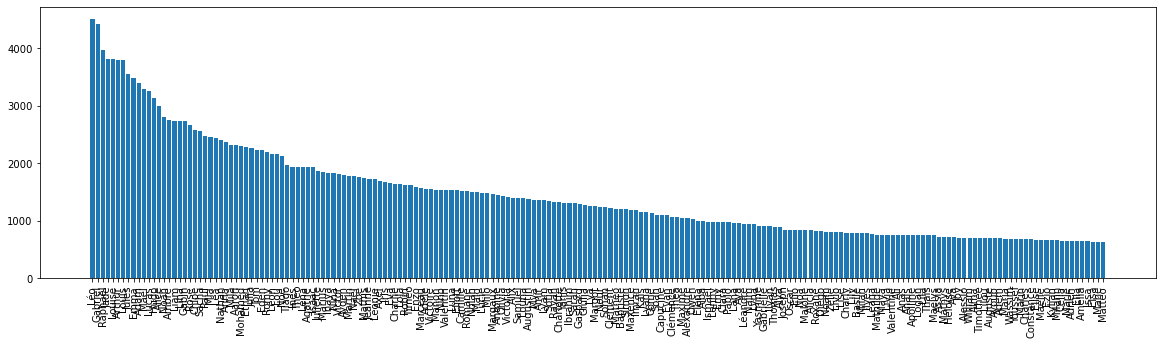

In [51]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
plt.bar(prenom_2020['preusuel'].str.capitalize(), prenom_2020['nombre'])
plt.show()

### seaborn

Une surcouche de matplotlib. C'est bien plus joli et facile à manipuler.

Cela s'approche du mieux qe l'on peut faire actuellement https://ggplot2.tidyverse.org/index.html avec le logiciel R, qui est la réfence actuellement dans ce qui se fait de joli en graphique. 

#### Palette de couleur

Seaborn utilise des palette pour représenter ses figure.

> **Attention** : pour ne pas passer pour un plouc, n'utilisez pas plus d'une dizaine de couleurs !

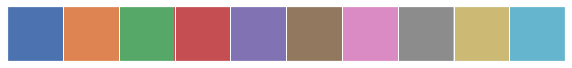

In [52]:
import seaborn as sns

sns.set()
current_palette = sns.color_palette()
sns.palplot(current_palette) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

#### graphique

On procède comme précédemment, par étape successive. 
On commence par mettre l'histogramme tout bête. On va toujours procéder de la même manière : 

1. créer le graphique avec matplotlib : `fig, ax = plt.subplots(figsize=(20, 5))` 
2. ajouter des choses au dessin : plusieurs commandes ajoutant des choses au dessin, c'est à dire `ax`
3. représenter la figure (commande `plt.show()`) ou la sauver dans un fichier


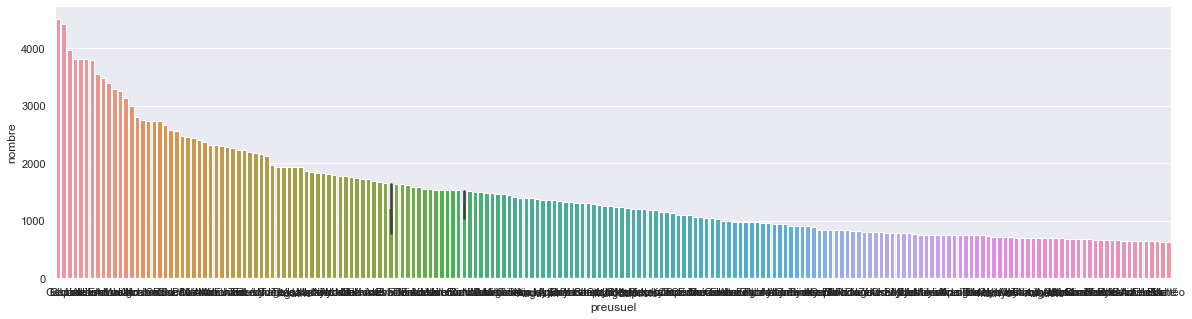

In [53]:
# 1. créer le dessin (ici ax)
fig, ax = plt.subplots(figsize=(20, 5)) 

#  2. ajouter des choses au dessin
sns.barplot(x=prenom_2020['preusuel'].str.capitalize(), 
            y=prenom_2020['nombre'],
            ax=ax)

# 3. représenter le graphique
plt.show()

Bon, c'est un début on va dire. Commençons par ne prendre que les 100 premiers prénoms.

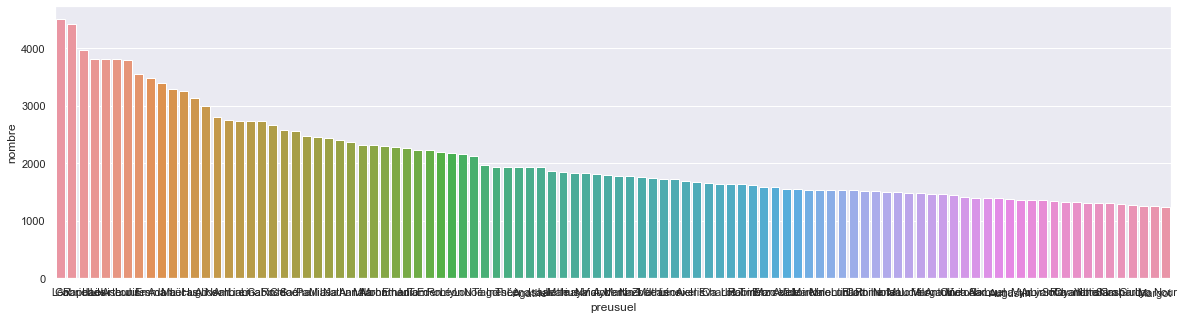

In [54]:
data = prenom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5)) 

sns.barplot(x=data['preusuel'].str.capitalize(), 
            y=data['nombre'],
            ax=ax)

plt.show()

Les prénoms c'est pas ça. On va les retourner de 90°.

Pour ça, il faut modifier le dessin avant de l'afficher. On le sauve dans dans une variable (`chart`) que l'on modifie et enfin que l'on dessine (`plt.show()`)

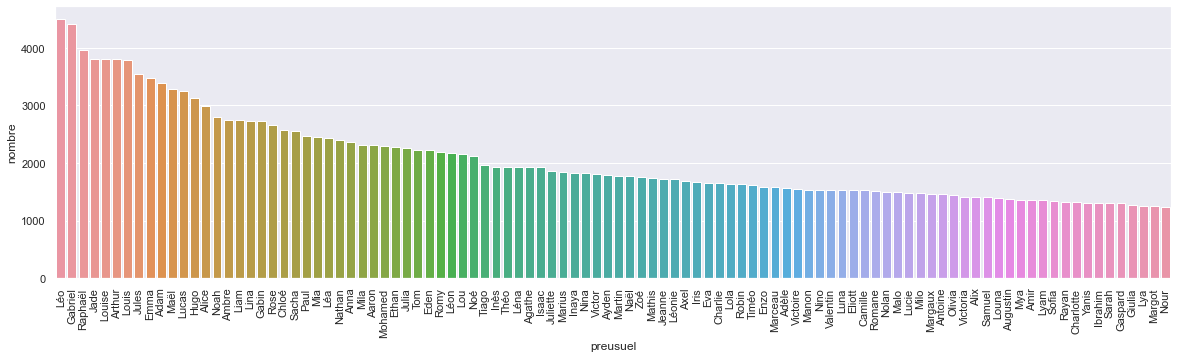

In [55]:
data = prenom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5)) 

chart = sns.barplot(x=data['preusuel'].str.capitalize(), 
                    y=data['nombre'],
                    ax=ax)

plt.xticks(rotation=90)

plt.show()

On met des jolies labels au graphique :

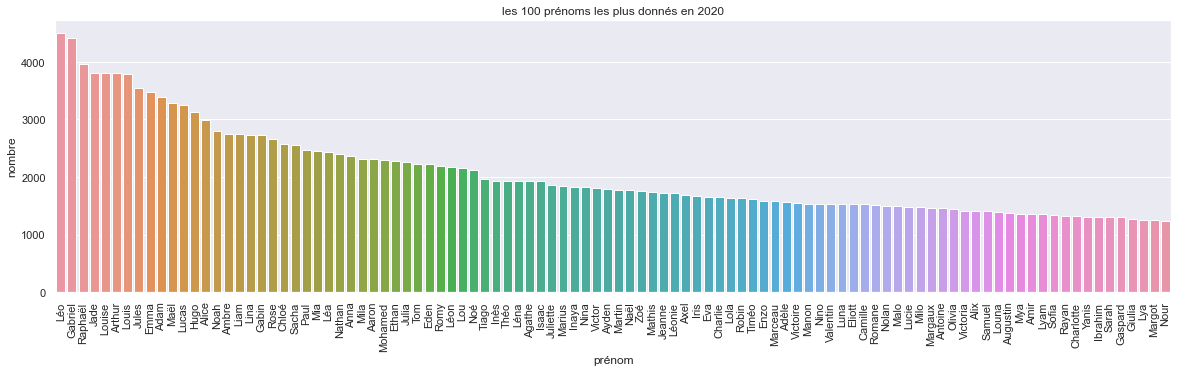

In [56]:
data = prenom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5)) 

chart = sns.barplot(x=data['preusuel'].str.capitalize(), 
                    y=data['nombre'],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("les 100 prénoms les plus donnés en 2020")
ax.set_xlabel('prénom')

plt.show()

On va donner ds couleurs un peu plus règlementaires. Bleu pour les garçons et rose pour les filles :

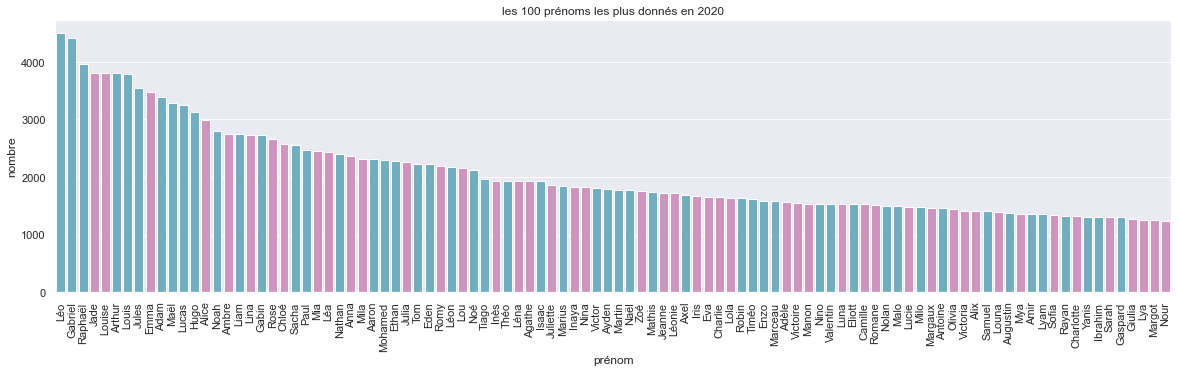

In [57]:
data = prenom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5)) 
chart = sns.barplot(x=data['preusuel'].str.capitalize(), 
                    y=data['nombre'],
                    palette=[current_palette[9] if (x == 1) else current_palette[6] for x in data['sexe']],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("les 100 prénoms les plus donnés en 2020")
ax.set_xlabel('prénom')

plt.show()

#### sauvegarde

In [58]:
# formats supportés :

plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

Pour sauver, il faut refaire la figure. On remplace `plt.show()` par `plt.savefig`

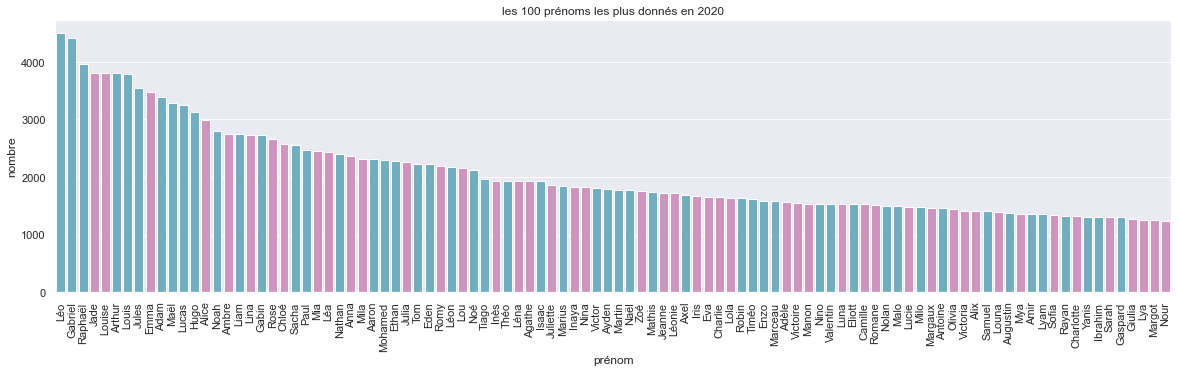

In [59]:
data = prenom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5)) 

chart = sns.barplot(x=data['preusuel'].str.capitalize(), 
                    y=data['nombre'],
                    palette=[current_palette[9] if (x == 1) else current_palette[6] for x in data['sexe']],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("les 100 prénoms les plus donnés en 2020")
ax.set_xlabel('prénom')

plt.savefig("naissances_2020.pdf", format="pdf", bbox_inches='tight')